# Assignment 2

## From Group 10 - Gender Perspectives in Peace Agreements --Liu Yanan(S1963863)
* The database lists all the peace agreements between 1990 and the present day which have provisions on women, gender or sexual violence, and provides full search features for what those provisions deal with.


### (Following text is copied in from the Course Handbook as same as what Assignment 1 did)

This assignment addresses three learning outcomes equally:
* LO1: Data - demonstrate that you understand the data that you have in terms of fields and data types, carrying out simple statistics and plotting graphs. Show that you can explore the data, coming up with your own enquiry describes some key findings from the data and that goes on to ask meaningful questions. Show a sensitivity to ethics and personally identifying information.

* LO2: Program - use good programming style - concise, clear, safe, making use of library functions. Use assertions to make sure the data is as you think it should be. You do not need to overcomplicate. Create code that would work equally well with another file with the same format of data. Manage multiple files appropriately if you have them, and automate processing where appropriate. Use appropriate libraries while making sure that your code runs on the notebook server.

* LO3: Communicate - Explain your understanding of the data that you have, communicating to people unfamiliar with the context. Explain what you are doing and why, using a combination of text, graphics, comments and assertions. Explain what you have found, and how it could be  understood in context, as well as setting out a future investigation. 

## Brief 
Carry out a structured analysis of a portion of the data provided by your data holder. This should be structured as follows. This assignment is carried out with your group project. However,  each student has to hand in their **own** and **individual** analysis. Within each group, students  should decide that each student is doing an independent piece of analysis on a different part  of the data.  


## Submission
Each student should be submit an individual Jupyter notebook, with all of the output present, 

which we can run. Some notes:
* If you have installed nonstandard packages, document what they are and how to install them.
* You only need to submit your notebook through Learn - we will organise the data separately as some of you have large/private databases.
* Make sure you have saved your notebook ​with the output​ , so we can immediately see your graphs etc.
* Make sure you document which files are used at which point in the analysis.
* Plagiarism is treated extremely seriously! You may be working on the same data, but we would expect to see different reports. In particular, the explorations should not be the same between members of the group. Discussion is absolutely fine and encouraged - wholesale copying is not.



# Setup

In [417]:
# Installing required packages
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pyecharts


In [418]:
# Necessary import for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from pyecharts.charts import Pie
from pyecharts import options as opts


First, load the data, from the data probided by our data holder.  

Most of the data from The PA-X database website: https://www.peaceagreements.org/ 

In [421]:
# Read in the data
wgg_all_data = pd.read_excel("pax_wgg_all_agreements_data.xlsx")
all_data = pd.read_excel("pax_all_agreements_data.xlsx")

# Have a look at it
wgg_all_data.head()

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,WggRehab,WggEdu,WggHea,WggRepro,WggDevOth,WggImpl,WggImplRole,WggImplSign,WggImplOth,WggOth
0,Afghanistan,Government/territory,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,2232,3,Resolution of Intra Afghan Peace Conference in...,2019-07-08,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,2,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,2,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,1,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,...,1,1,1,0,0,0,0,0,0,0
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,1,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,...,0,1,0,0,0,0,0,0,0,0


The excel called **pax_all_agreements_data.xlsx** records all the agrements, while **pax_wgg_all_agreements_data.xlsx** record the agreements which corresponding to The Gender Perspectives.  

Our group's research will only force on **gender perspectives**. (The other one will just use to compare the relationship or find other relevances.)

# Cleaning

The data should be checked whether have something wrong with it.Here is the steps for me to exlore the data and clean them:

First, I want to check whether this database has some NaN values, and obviously in column **Loc2ISO, Loc2GWNO, UcdpAgr, PamAgr, CowWar** have kinds of blank. In this way, I recognize that reading the codebook is pretty important for this tabular.

In [422]:
wgg_all_data.loc[:,['Loc2ISO']].isnull().T.any()

0      True
1      True
2      True
3      True
4      True
       ... 
366    True
367    True
368    True
369    True
370    True
Length: 371, dtype: bool

In the codebook( which could download in this link: https://www.peaceagreements.org/files/PA-X%20codebook%20Version4.pdf & https://www.peaceagreements.org/files/WGG_codebook_June2020.pdf)

Here mentioned the reason of why this positions are empty.

**Loc1ISO and Loc2ISO**, this two columns Indicates primary location of intrastate conflict and returns the ISO country designation. Only in the case of interstate conflict the Loc2ISO will have content. And another specific situation is when this agreements that deal with mul-tiple locations and conflicts, this two fields will both left empty.

**Loc1GWNO and Loc2GWNO** have the same rule, but use the Gledisch-Ward country code.

In this way I can assert that 
1. When the column Loc2ISO left empty, the column Loc2GWNO should also be left empty.
2. The column Loc1ISO is empty and means Loc1GWNO is also empty.
 
However, what I find is that...

In [423]:
print(wgg_all_data.loc[wgg_all_data['Loc2ISO'].isnull(),'Loc2GWNO'])
print("====================================")
print(wgg_all_data.loc[wgg_all_data['Loc1ISO'].isnull(),'Loc1GWNO'])

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
366   NaN
367   NaN
368   NaN
369   NaN
370   NaN
Name: Loc2GWNO, Length: 347, dtype: float64
21       NaN
22       NaN
23       NaN
25       NaN
164    347.0
Name: Loc1GWNO, dtype: float64


Obviously in 164 there is something different which the Loc1ISO is empty but the Loc1GWNO has content '347', which I have checked the code list from the reference(http://ksgleditsch.com/data-4.html), this means 'KOS Kosovo', and the part is Signed only by some members of the Kosovo delegation: Rexhep Qosja; Blerim Shala; Veton Suroi; Unsigned by: Federal Republic of Yugoslavia; Republic of Serbia. In this way, the Loc1ISO should have the content KOS, I think.
 
Here, I will modify it temporarily and consult the holder later.

In [424]:
wgg_all_data.iloc[164,18]='KOS'
print(wgg_all_data.loc[wgg_all_data['Loc1ISO'].isnull(),'Loc1GWNO'])

21   NaN
22   NaN
23   NaN
25   NaN
Name: Loc1GWNO, dtype: float64


Then is about UcdpAgr, PamAgr, CowWar.
These three columns corelated the different number or ID in different databases. When it is empty, it means not having the Uppsala Conflict Data Program peace agreement ID, Kroc Institute’s Peace Accords Matrix agreement ID or War Number.

In [425]:
wgg_all_data[['UcdpCon','UcdpAgr','PamAgr','CowWar']] 

,UcdpCon,UcdpAgr,PamAgr,CowWar
0,333.0,NaN,NaN,225.0
1,333.0,1488.0,NaN,851.0
2,333.0,NaN,NaN,225.0
3,333.0,NaN,NaN,225.0
4,333.0,NaN,NaN,225.0
...,...,...,...,...
366,230.0,1535.0,NaN,NaN
367,230.0,NaN,NaN,NaN
368,230.0,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN


To make the table more canonical, we set the null value of all the data to "NA".

In [426]:
wgg_all_data.fillna('NA',inplace = True)
wgg_all_data[['UcdpCon','UcdpAgr','PamAgr','CowWar']] 

,UcdpCon,UcdpAgr,PamAgr,CowWar
0,333,NA,NA,225
1,333,1488,NA,851
2,333,NA,NA,225
3,333,NA,NA,225
4,333,NA,NA,225
...,...,...,...,...
366,230,1535,NA,NA
367,230,NA,NA,NA
368,230,NA,NA,NA
369,NA,NA,NA,NA


Furthermore, I want to find outliers and clusters. But soon I found our database does not record some information like the use of time, pay of money, etc. This data has recorded different agreements, which are very different from each other, so it is hard to make these operations.

Now that data is clean, and I want to use some assert statements to check more detail.


In [431]:
assert wgg_all_data['Dat'].all() >'1990-01-01' and wgg_all_data['Dat'].all() <'2020-11-09', "Date Signed is in wrong range "
assert wgg_all_data['AgtId'].duplicated().all() == False, "The AgtId is not the unique value"
assert wgg_all_data['WggPar'].all() == 0 or 1, "There have something wrong with column AA-CA"
assert wgg_all_data['N_characters'].all() > 0 , "There number of characters should >0, wrong!"

-----------------------------------------

# Describe
tell us about the data that you have. We expect to see some details.

**1. what is the general type of the data (tabular, network, geographical, textual etc.)**

The type of this data is a tabular.

-----------------------------------------

**2. how large and complex is it (rows/columns, size, variation, structure)**

In [432]:
print("How many columns: " + str(wgg_all_data.columns.size))

print("How many rows: " + str(wgg_all_data.iloc[:,0].size))


How many columns: 79
How many rows: 371


This is a database which only takes 239kb with 371 rows. Compared with the all the pax agreement which has 1869 rows, this is a small database. 
 
The database lists all the peace agreements between 1990 and the present day which have provisions on women, gender or sexual violence, and provides full search features for what those provisions deal with.
The structure of this table is like...


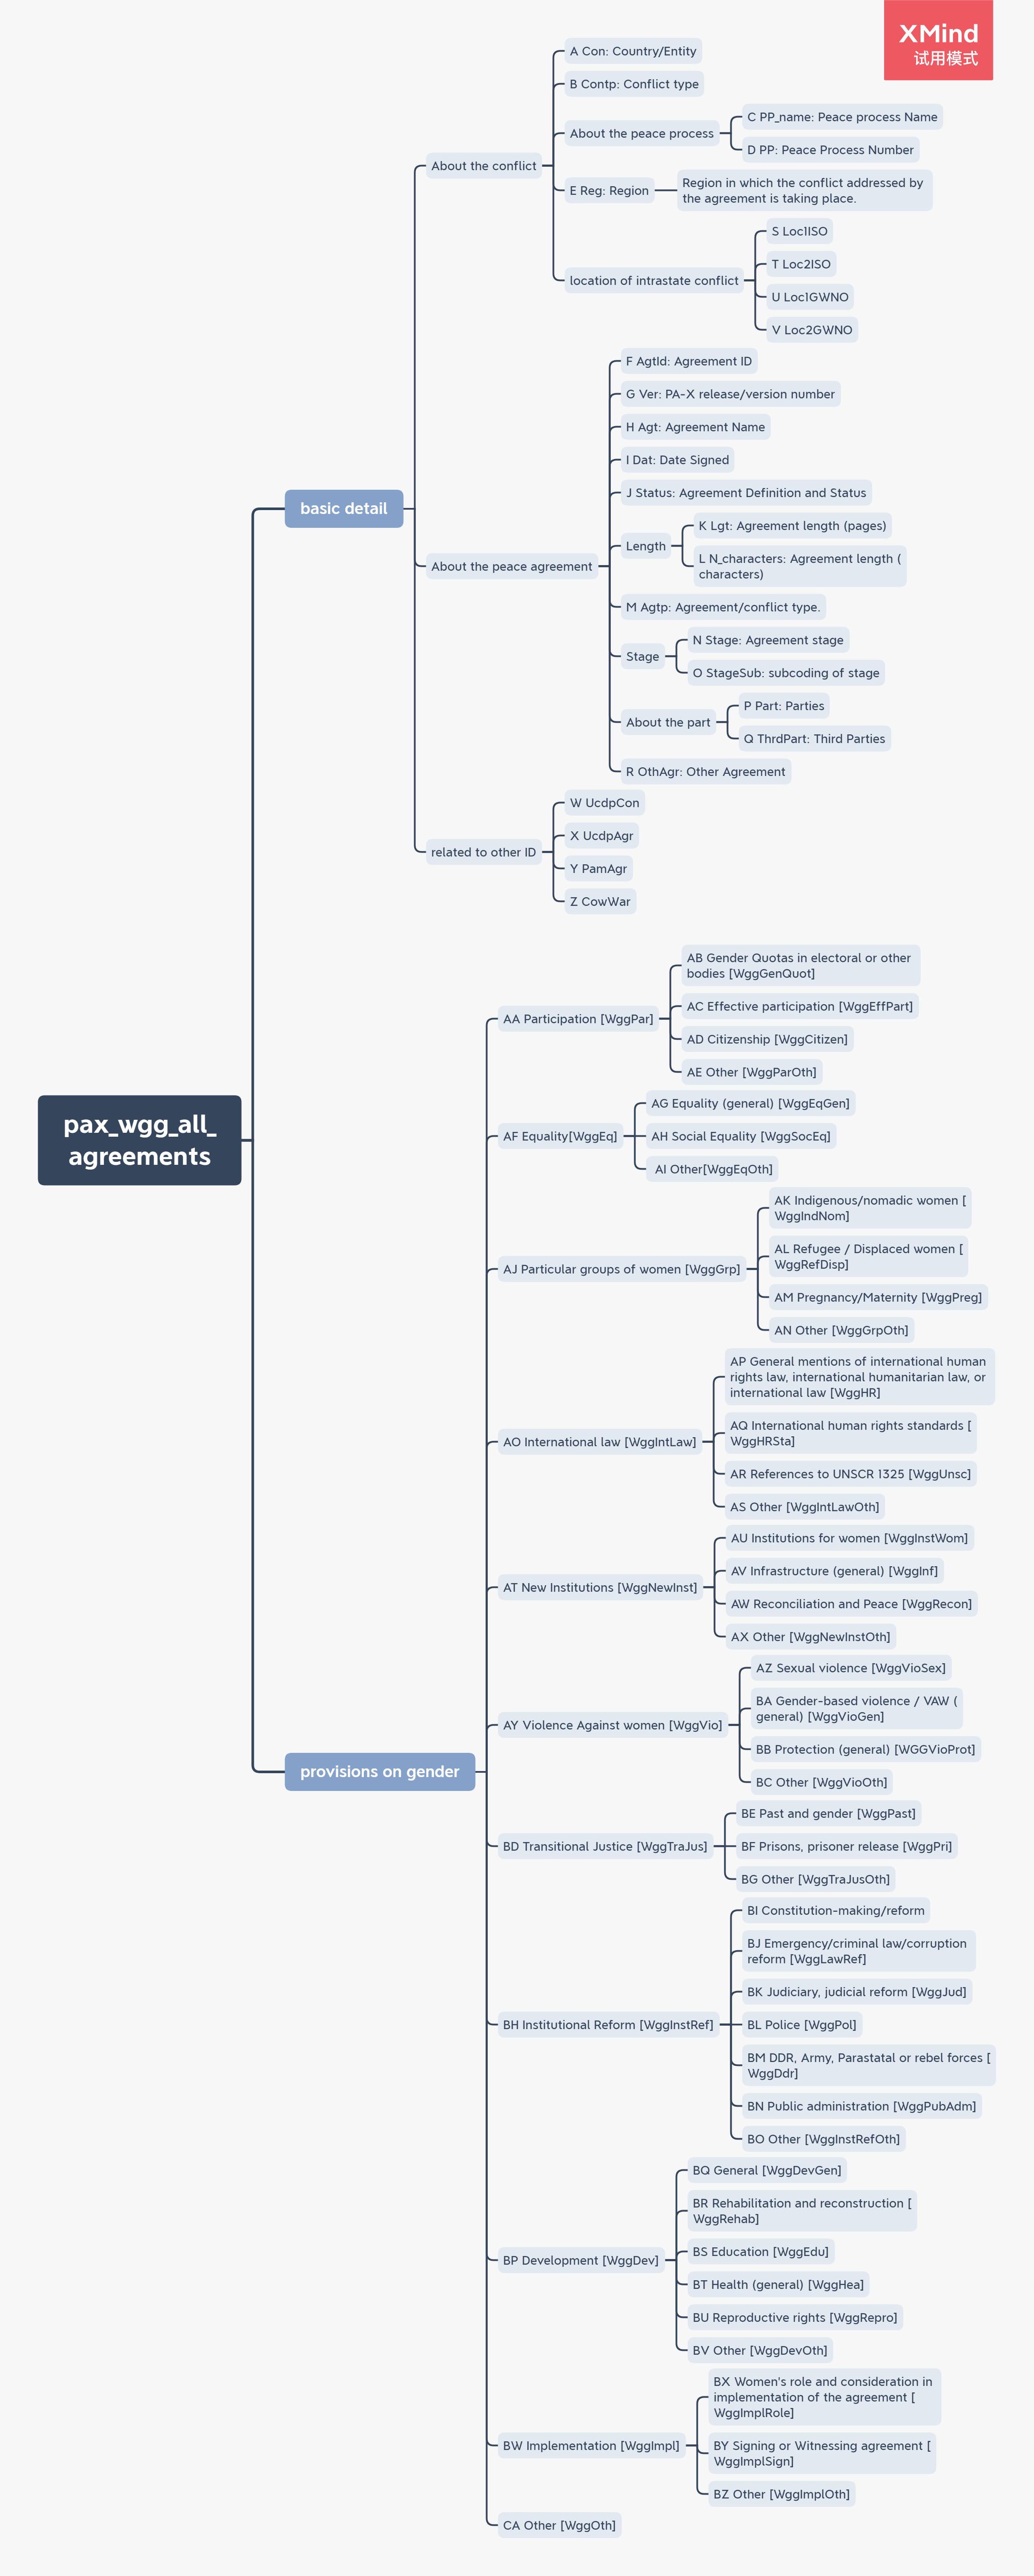

The columns A-Z are the basic details of the agreements which are mainly divided into 3 parts: About the conflict, About the peace agreement and relation to other databases.  
 
The AA-CA is the relationship corresponding to gender Perspectives, which basically divided into 11 parts: participation, equality, particular groups of women, international law, new institutions, violence against women, transitional justice, institutional reform, development, implementation and other.
 
AA-AE is one part about Participation. In the database, AA column means whether they have any form of women’s participation, as detailed in the subcategories that follow with AB AC AD AE.
 
So when we want to calculate the summary of how many parts one agreement has, we do not have to add AA to CA. We just need to add the 11 categories together.
 
The rules or variations of the whole table can be observed through time and geographical location.

-----------------------------------------

**3. What fields and data types are present (max/min, levels for categorical values).**

In [434]:
print("The max of Lgt :" + str(wgg_all_data['Lgt'].max()))
print("The max of characters :" + str(wgg_all_data['N_characters'].max()))

The max of Lgt :323
The max of characters :908459


For categorical values, for example, the Agtp: Agreement/conflict type, this part has different meanings of the categories.
 
Inter: Interstate/interstate conflict. Interstate treaty relating to interstate conflict. E.g. Iraq/Kuwait, or North/ South Korea
 
InterIntra: Interstate/mixed or intrastate conflict.
 
Intra: Intrastate agreement relating to intrastate conflict
 
IntraLocal: These are agreements that are related to or an intrastate conflict, but are aiming to resolve local issues rather than what is perceived as a conflict-wide issue.
 
for Contp: conflict type,type of conflict the agreement is addressing:
 • Government
 • Territory
 • Government/territory
 • Inter-group
 • Other
 
To be able to simplify and find common ground, there are lots of columns that have this kind of method to category the data.
 
What's more, about column of AA-CA, the 1 or 0, means have or not have.The value on the variable is equal to 1, otherwise takes the value of 0.
 
However, I do not think there are some level differences.Just to category the difference between area or nature.

-----------------------------------------

**4. Links between this data and other data (e.g. foreign keys, unique ids)**

The unique Id of this data is column F agtId which is the unique identifying number for each of the agreements.

And about the IDs link to other data, it is column W-Z

W UcdpCon: Uppsala Conflict Data Program Conflict ID. Note that the Conflict IDs applied are from 2017 and onward, after the UCDP introduced a new system of conflict designation.

X UcdpAgr: Uppsala Conflict Data Program peace agreement ID. For more information on these data, see

Y PamAgr: Kroc Institute’s Peace Accords Matrix agreement ID.

Z CowWar: Correlates of War: War Number.

-----------------------------------------

**5. Summary statistics about the data - how many people, what time frame, field averages etc.**

In [435]:
print("how many region :" + str(wgg_all_data['Reg'].unique().shape[0]))
print("how many countries :" + str(wgg_all_data['Con'].unique().shape[0]))
print(wgg_all_data['Con'].describe(percentiles=[]))
print("====================================================")

print("About the characters of each agreements: ")
print(wgg_all_data['N_characters'].describe(percentiles=[]))
print("====================================================")

print("About the how many categories one agreement have: ")
wgg_all_data['wgg_all'] = wgg_all_data['WggPar'] + wgg_all_data['WggEq'] + wgg_all_data['WggGrp'] + wgg_all_data['WggIntLaw'] + wgg_all_data['WggNewInst'] + wgg_all_data['WggVio'] + wgg_all_data['WggTraJus'] + wgg_all_data['WggInstRef'] + wgg_all_data['WggImpl'] + wgg_all_data['WggOth'] 
print(wgg_all_data['wgg_all'].describe(percentiles=[]))

how many region :6
how many countries :76
count          371
unique          76
top       Colombia
freq            24
Name: Con, dtype: object
About the characters of each agreements: 
count       371.000000
mean      36050.334232
std       77963.877920
min         750.000000
50%       14376.000000
max      908459.000000
Name: N_characters, dtype: float64
About the how many categories one agreement have: 
count    371.000000
mean       2.175202
std        1.741087
min        0.000000
50%        2.000000
max       10.000000
Name: wgg_all, dtype: float64


There are 76 countries and 6 regions involved, in which Colombia has the most number of agreements related to gender perspectives( sum 24).
 
About the character number of each agreement, the average is 36050, min is 750 and max is 908459, which has a big range.
 
About how many categories one agreement has, the average is 2, however some of the agreement mentioned all the topics.
 
About the time frame, it is basically from 1990 to present.

-----------------------------------------

**6. How does the data relate to the questions that the data owner has discussed with you?**

Unfortunately, our data owner just wants us to explore new methods to regard this data freedomly.
 
We do not have a specific topic about what he wants us to do. But I totally believe that in this way we have infinite possibilities, and we can try every region that we think is doable.
 
In this way, Our group's idea about assignment 2 is for the entire table, each person tries to expand in the direction they think is possible independently.

-----------------------------------------

# Explore
carry out a deeper exploration of the data. This includes looking at individual fields/variables to see the distribution of values they take (e.g. evenly distributed, bell curves, bi-modal) or how they are distributed in time. It also includes relationships between variables in your dataset: are there correlations? In which direction? Complex curves? 

**1. 4-5 exploratory visualisations, presented in a readable form, with an explanation about what you have found**

1. First, I want to explore how many gender-related peace agreement do a region have. Which region have the most amounts of agreements related to gender.

Africa (excl MENA)              171
Asia and Pacific                 72
Europe and Eurasia               45
Americas                         40
Middle East and North Africa     39
Cross-regional                    4
Name: Reg, dtype: int64


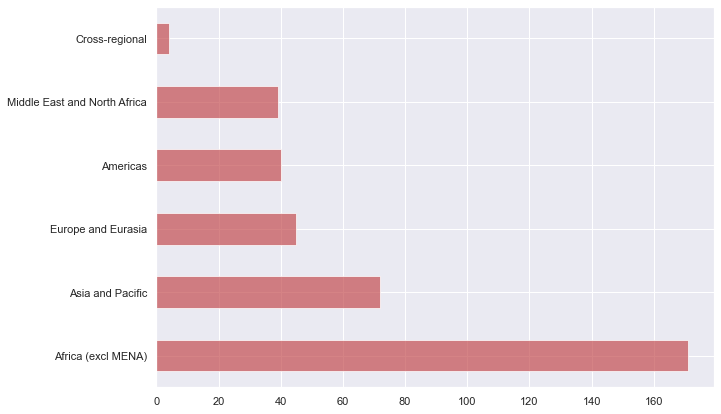

In [436]:
#set a new database only about how many gender-related peace agreement do a region have
con_fre_wgg = wgg_all_data.Reg.value_counts()
print(con_fre_wgg)

# try to use some different way to draw a chart
con_fre_wgg.plot.barh(color='r',alpha=0.7,figsize = (10,7))
plt.show()

Obviously, the peace agreement in Africa(excl MENA) is the largest number in 171, which is almost as much as the combination of Asia and Pacific, Europe and Eurasia, Americas. As a matter of fact, I think this is mainly because Africa has more wars and more inequality problems. 
 
To prove my hypothesis, I used the complete peace Agreement data to draw the diagram again...

In [437]:
#set a new database only about how many peace agreement do a region have
con_fre_all = all_data.Reg.value_counts()
print(con_fre_all)

# try to use some different way to draw a chart
x = con_fre_all.index.tolist()
y = con_fre_all.tolist()
data_pie = [list(i) for i in zip(x,y)]

pie = Pie()

pie.add(series_name="Num",data_pair=data_pie,radius=['30%','85%'])

pie.set_series_opts(tooltip_opts=opts.TooltipOpts(trigger='item',formatter="{b}:{c} ({d}%)"))

pie.render_notebook()


Africa (excl MENA)              584
Europe and Eurasia              411
Asia and Pacific                377
Middle East and North Africa    263
Americas                        195
Cross-regional                   38
Name: Reg, dtype: int64


In this chart, the number of how many peace agreements have in Africa (excl MENA) is not dominant. So continue I want to check the proportion of this to cofirm my idea...

                            Reg  all_num  wgg_num  proportion
0            Africa (excl MENA)      584      171       0.293
1            Europe and Eurasia      411       72       0.175
2              Asia and Pacific      377       45       0.119
3  Middle East and North Africa      263       40       0.152
4                      Americas      195       39       0.200
5                Cross-regional       38        4       0.105


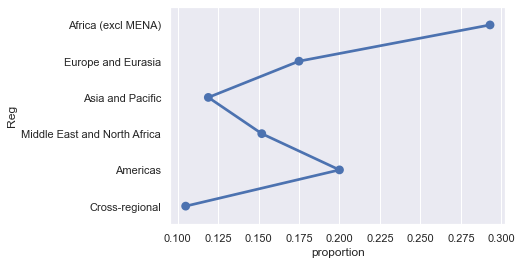

In [438]:
df = {'Reg':con_fre_all.index,'all_num':con_fre_all.values,'wgg_num':con_fre_wgg.values}
new_pax = pd.DataFrame(df)
new_pax['proportion'] = round(new_pax['wgg_num']/new_pax['all_num'],3)
print(new_pax)

new_pax_chart = sns.pointplot(x='proportion',y='Reg',data=new_pax)
plt.show()



Based on this proportion, I can reach an objective conclusion.
1. Afirica has the highest number of peace agreements both in all and peace part, and the proportion of there is also the highest. I think it is actually based on the years of wars, and also the female's status is not high there.
2. Europe and Eurasia have a lot of peace agreements but just a few related to gender aspects. Perhaps this reflects that the status of local women is good.
3. The number of cross-regional peace agreements is the lowest.

-----------------------------------------

2. Basicly, I want to know the relationship between the characters and the number of peace aspects categories one agreement had.

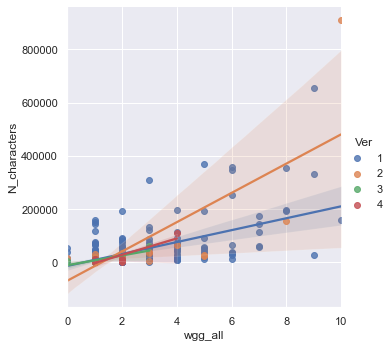

In [439]:
chart_open = sns.lmplot(x='wgg_all', y='N_characters', hue='Ver', data= wgg_all_data)
plt.show()

Generally speaking, the trend is more words and more categories.
 
Most of the agreements have less than 200000 words.
 
It seems that agreements which have few characters, have more versions (it is really related? hahaha)

-----------------------------------------

3. Another things quite intertesed me is the categories of gender perspectives, whether it has been changed during the 30 years?I am inclined to find the relation of date and categories in gender perspectives.

 Due to the format of date is YYYY-MM-DD, first I have to split the Dat.

    year WggPar WggEq WggGrp WggIntLaw
25  1990      0     2      0         1
24  1991      2     5      2         1
21  1992      0     2      0         1
20  1993      3     4      0         1
19  1994      1     3      3         3


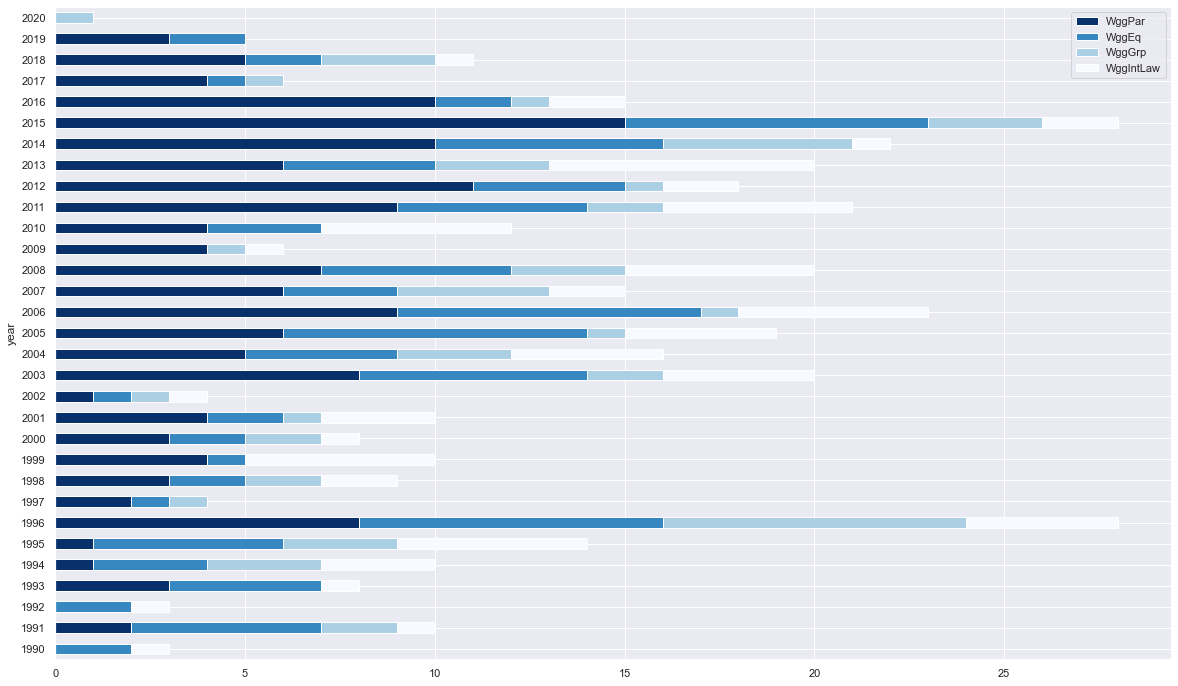

In [440]:
wgg_all_data['year'] = wgg_all_data['Dat'].apply(lambda x:x[:4])

wgg_all_year = pd.melt(wgg_all_data,id_vars=['year'],value_vars=['WggPar','WggEq','WggGrp','WggIntLaw'])


wgg_year = pd.DataFrame(columns=('year', 'WggPar', 'WggEq', 'WggGrp','WggIntLaw'))

#rebuild the database
for i in wgg_all_data['year'].unique():
    wgg_all_year1 = wgg_all_year.loc[wgg_all_year['year']== i,:]
    
    wgg_all_WggPar = wgg_all_year1.loc[wgg_all_year1['variable']== 'WggPar','value'].sum(axis=0)
    wgg_all_WggEq = wgg_all_year1.loc[wgg_all_year1['variable']== 'WggEq','value'].sum(axis=0)
    wgg_all_WggGrp = wgg_all_year1.loc[wgg_all_year1['variable']== 'WggGrp','value'].sum(axis=0)
    wgg_all_WggIntLaw = wgg_all_year1.loc[wgg_all_year1['variable']== 'WggIntLaw','value'].sum(axis=0)
    
    wgg_year.loc[wgg_year.shape[0]]= {'year':i,'WggPar':wgg_all_WggPar,'WggEq':wgg_all_WggEq,'WggGrp':wgg_all_WggGrp,'WggIntLaw':wgg_all_WggIntLaw}

# sort by the years
wgg_year = wgg_year.sort_values(by='year')
print(wgg_year.head())


wgg_year.plot.barh(x='year',grid = True,colormap='Blues_r', stacked=True, figsize = (20,12)) 
plt.show()

I only force on the first four categories:'WggPar','WggEq','WggGrp','WggIntLaw'
Because the original table was composed entirely of binary 0 and 1, I have to rebuild the table force for years.
 
Here are some findings. 
In 1996 and 2015, these two years have the largest amounts of agreements related to gender, especially in the first four categories.
In general, there are more relative regulations each year until 2016. After 2016 the amounts begin to fall.
 
About the WggGrp(Particular groups of women), there are several years that do not have been mentioned(1990,1992,1993,1999,2010,2020), in these four categories, having the most years are not mentioned.

**2. 1-2 relationships between variables analysed**

1. The region and the number of peace agreements, peace agreements related to gender perspective and the proportion of this.
We have found that Africa takes most percentage of the amounts of these three parts, which in some way to verify the local conflict and women's inequality are both serious problems.
 
 
2. Most of the agreements have less than 200000 words.
 
 
3. In 1996 and 2015, these two years have the largest amounts of agreements related to gender, especially in the first four categories.
 
4. Colombia is the country which has the largest number of regulations forced on women's aspect.
 
More details have been mentioned upward.

-----------------------------------------

**3. Ideas about trends, outliers, clusters**

About the relationship between the characters and the number of peace aspects categories one agreement had. I basically find trends that more and more peace agreements force on the problem of gender increasing by years. Before 2002, the amount of one year's first 4 categories related methods was no more than 10, which was quite bad. However, 1996 hit its peak. This year must have some special things.
 
Because the data as a whole is not very regular in some rules, I do not think here have some outliers or clusters.

-----------------------------------------

**4. Reference to statistics, i.e. a sense of which relationships are significant, and what
claims you can back up.**

I have read this reference:https://www.globalcitizen.org/en/content/womens-empowerment-in-colombia-exciting-progress/
 
It is called Women's empowerment in Colombia: exciting progress!, in which mentioned the situation about conflict 'There has been long-running conflict in the country which has claimed lives and limited opportunities for people.' and situation about gender equity, 'Since 1990 there have also been important achievements in women’s empowerment in terms of political voice, access to decision-making roles, and capacity to shape law and policy on gender equality.'
 
In my opinion, this article shows the relationship of conflict positively associated with gender inequality. This is what I have also mentioned.
 
This article:https://www.un.org/womenwatch/daw/egm/peace2003/, "Peace agreements as a means for promoting gender equality and ensuring participation of women – A framework of model provisions", mentioned that in the new millennium, more organizations and individuals are paying attention to gender equality. This may be the reason for a larger number of peace agreements related to gender aspects.

-----------------------------------------

# Reflect and Hypothesise
What do you think might be behind the relationships and distributions that you have found? How does your data relate to the world? In short, what hypotheses came up as you explored the data, and how would you go about testing them?

**1. A 200 word reflection on the data.**

When our group first got the data from the data holder, we were worried about the strange presentation of the data, because in the AA-CA column, all the data was represented by binary 0 and 1, which seemed to mean that we didn't have many data trends to show. 

However, when we started this discussion, the first hurdle was figuring out what this data set showed, what each column represented, what the categories were. Fortunately, we had relevant codebooks to read, held meetings to discuss, communicated with the data holder and took a tutorial with our tutor. Even if we did not know anything about the Peace Agreement at the beginning, we could quickly understand the meaning of the whole data and conduct structural analysis. 

And the problem with the data is almost in a binary way, and obviously solved when I drew the fifth picture. I reset the primary key, melt it, and recalculated the entire table, finally got a new table that can show the trend, which I think is very beneficial to our subsequent research. 

This time, for data visualization, besides seaborn and Matplotlib used before, I also found time to learn the new library, Pyecharts, which can make some interactive charts more easily. The library also makes it easy to draw maps, which can be done in Assignment3. 

Compared with Assignment1, I found it more difficult to find explicit relationships in real data sets. But with this assignment, we have a lot of confidence in assignments 3.


-----------------------------------------

**2. 3-5 hypotheses with an explanation of:**

**■ What your hypothesis is**

**■ why you think that (referring to your graphs)**

**■ How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..)**

>H1: Kinds of confliction is positively associated with gender inequality.  
Why: based on the analysis of Africa area and colomba  
How: find more reference about this topic  


>H2: The number of characters is positively associated with the number of gender aspect related.  
Why: based on the analysis of characters and gender aspect.  
How: using some advanced algorithms  

>H3: The increase of years are positively associated with gender equality, more and more people force on this which started in 2000.  
Why: based on the analysis of years and categories.  
How: checking each data point individually  


>H4: The increase of years are not positively associated with different categories of gender equality,which have no specific relationship.  
Why: based on the analysis of years and categories.  
How: further studies and using some advanced algorithms  


-----------------------------------------